In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [2]:
data = pd.read_csv('data/Kobe.csv')

In [3]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge на тех же признаках - построить сравнительную таблицу коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. Посчитать RSS

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC
5. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной

**Посмотрим на датасет**

In [48]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
data.head(20)

,playoffs,shot_made_flag,dist,angle,remaining_time,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Cutting Finger Roll Layup Shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Finger Roll Shot,action_type_Driving Floating Bank Jump Shot,action_type_Driving Floating Jump Shot,action_type_Driving Hook Shot,action_type_Driving Jump shot,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Driving Slam Dunk Shot,action_type_Dunk Shot,action_type_Fadeaway Bank shot,action_type_Fadeaway Jump Shot,action_type_Finger Roll Layup Shot,action_type_Finger Roll Shot,...,period_3,period_4,period_5,period_6,period_7,season_0,season_1,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,season_10,season_11,season_12,season_13,season_14,season_15,season_16,season_97,season_98,season_99
0,0,NaN,181.859836,0.407058,627,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,157.000000,-0.000000,622,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1.0,168.600119,-0.928481,465,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,222.865430,0.903063,412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1.0,0.000000,1.570796,379,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0.0,145.416643,0.075717,572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1.0,0.000000,1.570796,532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,NaN,28.017851,1.535097,485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1.0,126.051577,-1.029016,372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0.0,129.282636,-1.312685,216,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [7]:
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


**Построим на карту успешных бросков**

Text(0.5, 1.0, 'loc_x and loc_y')

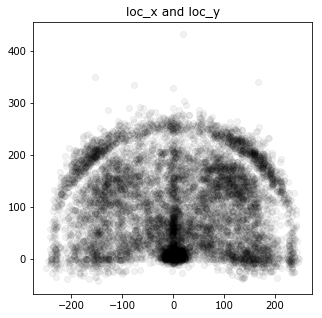

In [8]:
scored =  data[data['shot_made_flag'] == 1]
alpha = 0.05
plt.figure(figsize=(5,5))
plt.subplot()
plt.scatter(scored.loc_x, scored.loc_y, color='black', alpha=alpha)
plt.title('loc_x and loc_y')

**На графике видна высокая концентрация бросков из-под корзины и с трёх очковой зоны**

Вычислим более точную длину броска, а также угол броска относительно лицевой линии со стороны соперника.

In [9]:
#Вычислим более точную длину броска:
data['dist'] = np.sqrt(data['loc_x']**2 + data['loc_y']**2)

loc_x_zero = data['loc_x'] == 0
data['angle'] = np.array([0]*len(data))
data['angle'][~loc_x_zero] = np.arctan(data['loc_y'][~loc_x_zero] / data['loc_x'][~loc_x_zero])
data['angle'][loc_x_zero] = np.pi / 2

C:\Users\Aleksandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aleksandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Объединим признаки, связанные со временем:

In [11]:
data['remaining_time'] = data['minutes_remaining'] * 60 + data['seconds_remaining']

Обработаем категориальные признаки

In [12]:
data['season'].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [13]:
data['season'] = data['season'].apply(lambda x: int(x.split('-')[1]) )
data['season'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0], dtype=int64)

In [14]:
print(data['team_id'].unique())
print(data['team_name'].unique())

[1610612747]
['Los Angeles Lakers']


In [15]:
# В датасете много неифнормативных признаков, например 
# data.oppenent = data.matchup.map(lambda x: str(x)[-3:])

In [16]:
print(data.action_type.unique())
print(data.combined_shot_type.unique())
print(data.shot_type.unique())

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Driving Layup Shot' 'Reverse Layup Shot' 'Reverse Dunk Shot'
 'Slam Dunk Shot' 'Turnaround Jump Shot' 'Tip Shot' 'Running Hook Shot'
 'Alley Oop Dunk Shot' 'Dunk Shot' 'Alley Oop Layup shot'
 'Running Dunk Shot' 'Driving Finger Roll Shot' 'Running Layup Shot'
 'Finger Roll Shot' 'Fadeaway Jump Shot' 'Follow Up Dunk Shot' 'Hook Shot'
 'Turnaround Hook Shot' 'Running Tip Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Reverse Layup Shot'
 'Driving Finger Roll Layup Shot' 'Fadeaway Bank shot' 'Pullup Jump shot'
 'Finger Roll Layup Shot' 'Turnaround Fadeaway shot'
 'Driving Reverse Layup Shot' 'Driving Slam Dunk Shot'
 'Step Back Jump shot' 'Reverse Slam Dunk Shot' 'Turnaround Bank shot'
 'Running Finger Roll Layup Shot' 'Floating Jump shot'
 'Putback Slam Dunk Shot' 'Running Bank shot' 'Driving Bank shot'
 'Putback Layup Shot'

**Удалим из датасета лишние признаки**

In [17]:
drops = ['shot_id', 'team_id', 'team_name', 'shot_zone_area', 'shot_zone_range', 'shot_zone_basic', \
         'matchup', 'lon', 'lat', 'seconds_remaining', 'minutes_remaining', \
         'shot_distance', 'loc_x', 'loc_y', 'game_event_id', 'game_id', 'game_date']
for drop in drops:
    data = data.drop(drop, 1)

**Создадим dummy-признаки**:

In [18]:
categorical_vars = ['action_type', 'combined_shot_type', 'shot_type', 'opponent', 'period', 'season']
for var in categorical_vars:
    data = pd.concat([data, pd.get_dummies(data[var], prefix=var)], 1)
    data = data.drop(var, 1)

Построим несколько вариантов регрессий на полученных переменных

In [20]:
X = data[data['shot_made_flag'] >= 0]
Y = data[data['shot_made_flag'] >= 0]['shot_made_flag'].reset_index(drop = True)
X = X.drop(columns = ['shot_made_flag']).reset_index(drop = True)

In [21]:
data.shape, X.shape, Y.shape

((30697, 130), (25697, 129), (25697,))

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X, Y)

Y_pred = lr.predict(X)
lin_mse = mean_squared_error(Y, Y_pred)
lin_rmse = np.sqrt(lin_mse)
# Training error
print(lin_rmse)
print('Intercept:', lr.intercept_)
print('R^2: ', lr.score(X,Y))
print('RSS: ', sum((Y_pred-Y) ** 2))

0.4587504665288303
Intercept: 0.5910191888514407
R^2:  0.14831716840652087
RSS:  5407.984800917128


In [23]:
#for idx, col_name in enumerate(X.columns):
#    print("The coefficient for {} is {}".format(col_name, lr.coef_[idx]))

In [24]:
ridge = Ridge()
ridge.fit(X, Y)

Y_pred = ridge.predict(X)
lin_mse = mean_squared_error(Y, Y_pred)
lin_rmse = np.sqrt(lin_mse)
# Training error
print(lin_rmse)
print('Intercept:', ridge.intercept_)
print('R^2: ', ridge.score(X,Y))
print('RSS: ', sum((Y_pred-Y) ** 2))

0.45876098749209904
Intercept: 0.6048791866213183
R^2:  0.14827810304444822
RSS:  5408.232856738477


In [25]:
lasso = Lasso()
lasso.fit(X, Y)

Y_pred = lasso.predict(X)
lin_mse = mean_squared_error(Y, Y_pred)
lin_rmse = np.sqrt(lin_mse)
# Training error
print(lin_rmse)
print('Intercept:', lasso.intercept_)
print('R^2: ', lasso.score(X,Y))
print('RSS: ', sum((Y_pred-Y) ** 2))

0.48719558168001137
Intercept: 0.5677553888416146
R^2:  0.039424430283023004
RSS:  6099.427965974582


In [26]:
#for i in range(len(X.columns)):
#    if lasso.coef_[i] != 0:
#        print(lasso.coef_[i], 'для признака:', X.columns[i])

coef_df = pd.DataFrame()
coef_df['Features'] = X.columns
coef_df['Lin_reg'] = lr.coef_
coef_df['Ridge'] = ridge.coef_
coef_df['Lasso'] = lasso.coef_
coef_df.head(10)

,Features,Lin_reg,Ridge,Lasso
0,playoffs,-7.701483e-03,-0.007669,-0.000000
1,dist,1.903222e-04,0.000190,-0.000927
2,angle,2.669925e-03,0.002653,0.000000
3,remaining_time,6.855794e-05,0.000068,0.000022
4,action_type_Alley Oop Dunk Shot,7.341713e-02,0.066010,0.000000
5,action_type_Alley Oop Layup shot,3.008472e-02,0.028989,0.000000
6,action_type_Cutting Finger Roll Layup Shot,-4.100886e-15,0.000000,0.000000
7,action_type_Cutting Layup Shot,1.261552e-01,0.106851,0.000000
8,action_type_Driving Bank shot,-8.261487e-02,-0.062588,0.000000
9,action_type_Driving Dunk Shot,1.136762e-01,0.106503,0.000000


In [27]:
coef_df[coef_df.Lasso != 0]

,Features,Lin_reg,Ridge,Lasso
1,dist,0.000190,0.000190,-0.000927
3,remaining_time,0.000069,0.000068,0.000022


Как видим Lasso-регрессия не занулила только 2 признака: дальность броска и время до окончания матча.

***PCA***

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X.shape[1]).fit(X)
i = 0
for i in range(1, 5):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.829
n-components=2, explained variance 1.000
n-components=3, explained variance 1.000
n-components=4, explained variance 1.000


In [29]:
new_adv_df = pd.DataFrame(PCA(n_components=1).fit_transform(X), columns=["f1"])
new_adv_df["shot_made_flag"] = Y
new_adv_df.head()

,f1,shot_made_flag
0,299.538572,0.0
1,142.205809,1.0
2,87.132180,0.0
3,62.839106,1.0
4,250.027858,0.0


In [30]:
new_adv_df = pd.DataFrame(PCA(n_components=2).fit_transform(X), columns=["f1","f2"])
new_adv_df["shot_made_flag"] = Y
new_adv_df.head()

,f1,f2,shot_made_flag
0,299.538572,30.025842,0.0
1,142.205809,35.504203,1.0
2,87.132180,87.654444,0.0
3,62.839106,-136.330387,1.0
4,250.027858,16.503578,0.0


Построим модель на полученных признаках

In [31]:
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.metrics import roc_auc_score, roc_curve
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
xgb = xgboost.XGBClassifier(max_depth=4, n_jobs=-1)
xgb.fit(x_train, y_train)
y_train_predict = xgb.predict_proba(x_train)[:, 1]
y_test_predict = xgb.predict_proba(x_test)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 4)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 4)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  0.7395
Test:  0.7036


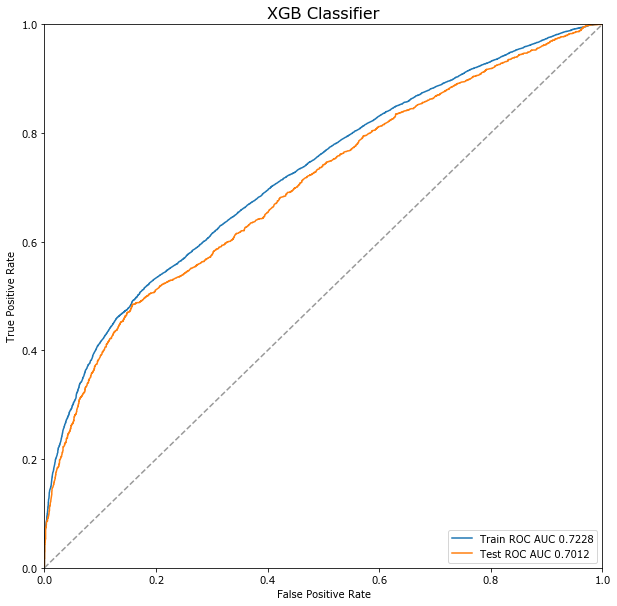

In [33]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

Проверим результат на кросс-валидации

In [47]:
from sklearn.model_selection import cross_val_score
cv_values = cross_val_score(xgb, X, Y, scoring='roc_auc', cv=4, n_jobs=-1)
cv_values.mean()

0.6843047758816923

Нельзя сказать что модель обладает высокой точностью, но она всё равно пытается предсказать успешность броска. Немного улучшить результат можно при помощи: кросс-валидации, подбора гиперпараметров, стекинга, блендинга, FE и FS.